# A Guide to Food Delivery Cost and Profitability Analysis Using Python.

Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at understanding and optimizing the financial dynamics of a food delivery operation. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability. In this article, we'll take you through the process of Food Delivery Cost and Profitability Analysis using Python. In the competitive landscape of food delivery services, achieving profitability is essential for sustainability and growth. However, understanding the intricate financial dynamics behind every order is crucial for optimizing costs and maximizing profitability. In this analysis, we will delve into the realm of food delivery cost and profitability using Python. By examining the comprehensive dataset provided, we aim to uncover insights that will guide strategic decisions to enhance the financial performance of the food delivery service.

**Objective:**
The primary objective of this analysis is to conduct a comprehensive evaluation of the cost structure and profitability of the food delivery service. Specifically, we aim to:
- Identify major cost components associated with delivering food orders, including direct expenses like delivery fees and indirect expenses such as discounts and commission fees.
- Calculate the profitability of individual orders and aggregate this data to assess overall profitability.
- Develop actionable recommendations to reduce costs, adjust pricing, commission fees, and discount strategies to improve profitability.
- Simulate the financial impact of proposed strategies on profitability using the dataset to forecast potential transformations from current losses into profits.

**Workflow:**

1. **Data Gathering:**
   - Collect detailed data on food delivery operations, encompassing order details such as Order ID, Customer ID, Restaurant ID, Order and Delivery Date and Time, Order Value, Delivery Fee, Payment Method, Discounts and Offers, Commission Fee, Payment Processing Fee, and Refunds/Chargebacks.

2. **Data Cleaning:**
   - Cleanse the dataset to rectify any inconsistencies, eliminate missing values, and remove irrelevant information. This ensures the dataset's integrity and reliability for subsequent analysis.

3. **Feature Extraction:**
   - Extract pertinent features from the dataset that could influence cost and profitability analysis. This may involve segmenting orders based on delivery distance, identifying high-value customers or restaurants, and categorizing payment methods.

4. **Cost Breakdown:**
   - Decompose the costs associated with each order into direct and indirect expenses. Direct expenses may encompass delivery fees and packaging costs, while indirect expenses could include discounts, commission fees, and payment processing fees.

5. **Revenue Calculation:**
   - Compute the revenue generated from each order, focusing on commission fees and the pre-discount order value. This step provides insights into the revenue streams contributing to the service's profitability.

6. **Profitability Analysis:**
   - Calculate the profitability of each order by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify patterns, such as high-profit or low-profit orders.

7. **Strategic Recommendations:**
   - Develop actionable recommendations based on the cost and profitability analysis. These recommendations may involve optimizing delivery routes, adjusting pricing strategies, negotiating better terms with restaurants and delivery partners, or refining discount strategies.

8. **Impact Simulation:**
   - Utilize the dataset to simulate the financial impact of proposed changes, such as adjusting commission rates or discount strategies. This simulation allows for forecasting how these adjustments could potentially improve overall profitability and guide decision-making.

Through this analysis, we aim to provide stakeholders with actionable insights to optimize operations, reduce costs, and enhance profitability in the competitive food delivery market.


In [2]:
import pandas as pd

food_orders = pd.read_csv("C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Optimizing Cost and Profitability Case Study/food_orders_new_delhi.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [3]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


## Data Cleaning and Preparation Steps:

1. **Convert Date and Time Columns:**
   - Transform "Order Date and Time" and "Delivery Date and Time" columns to datetime format for consistent date and time operations.

2. **Handle Discounts and Offers:**
   - Convert "Discounts and Offers" to a consistent numeric format if applicable, or calculate the discount amounts if provided in a different format.

3. **Format Monetary Values:**
   - Ensure all monetary values are in a suitable format for calculations, ensuring consistency and accuracy in financial analysis.

By completing these steps, the dataset will be cleaned and prepared for further analysis, allowing for accurate insights into cost structure and profitability in the food delivery service.

In [5]:
from datetime import datetime
# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

# apply the function to create a new 'Discount Value' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

# for percentage discounts, calculate the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

### Data Adjustments

1. **Date and Time Formatting:**
   - Converted "Order Date and Time" and "Delivery Date and Time" columns to datetime format for consistency in date and time operations.

2. **Discount Amount Calculation:**
   - Created a new column, "Discount Amount," by extracting and applying percentage or fixed discounts from the "Discounts and Offers" column to the order value.

3. **Addition of Discount Percentage:**
   - Included a new column, "Discount Percentage," to directly represent the discount rate or fixed amount discount for each order.

These adjustments ensure the data is standardized and ready for in-depth analysis of cost structure and profitability in the food delivery service.

## Cost and Profitability Analysis

For the cost analysis, we'll delve into the intricate details of the expenses associated with each order, encompassing:

1. **Delivery Fee:** This fee covers the operational costs incurred for delivering the order, including transportation and logistics expenses.

2. **Payment Processing Fee:** This fee accounts for the charges levied by payment processing services for facilitating transactions, ensuring secure payments, and managing financial operations.

3. **Discount Amount:** Reflecting customer incentives and promotional strategies, the discount amount represents the reduced price granted on the order, impacting revenue and overall profitability.

By meticulously calculating these cost components for each order, we aim to gain a comprehensive understanding of the financial overheads borne by the platform. This analysis will be instrumental in identifying cost drivers, optimizing resource allocation, and streamlining operational efficiency.

On the revenue front, the primary income stream for the platform arises from the Commission Fee. This fee, charged to restaurants for utilizing the delivery service, constitutes a significant portion of the platform's revenue. Therefore, understanding the revenue generated through commission fees is pivotal in evaluating the platform's financial performance.

To assess profitability, we'll compute the net profit by deducting the total costs, including discounts, from the revenue generated through commission fees. This holistic approach to profitability evaluation will provide actionable insights into the platform's financial health and viability.

Ultimately, this analysis serves as a strategic compass for decision-makers, guiding them in formulating informed strategies to optimize costs, maximize revenue, and enhance profitability in the competitive landscape of food delivery services.

In [7]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


## Financial Performance Analysis of Food Delivery Operations

After conducting a comprehensive analysis of the food delivery operations, the following key metrics have been identified:

- Total Orders: 1,000
- Total Revenue (from Commission Fees): 126,990 INR
- Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)
- Total Profit: -105,719.85 INR

**Insights:**
The analysis reveals that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. This indicates potential challenges in the current business model's sustainability for profitability. 

**Next Steps:**
To gain further insights into the distribution of costs, revenue, and profit, we will visualize the data using the following charts:

1. Histogram of Profits per Order: Visualize the distribution of profitable and unprofitable orders.
2. Pie Chart of Total Costs: Illustrate the proportion of total costs, including delivery fees, payment processing fees, and discounts.
3. Bar Chart Comparing Total Revenue, Costs, and Profit: Provide a comparative view of total revenue, total costs, and total profit.

By visualizing these metrics, we aim to gain a clearer understanding of the financial performance of the food delivery operations and identify areas for improvement.

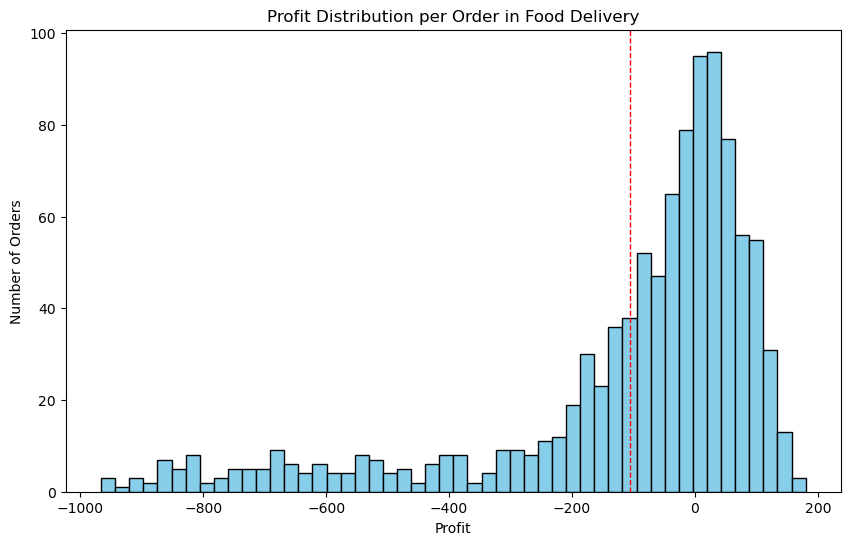

In [8]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

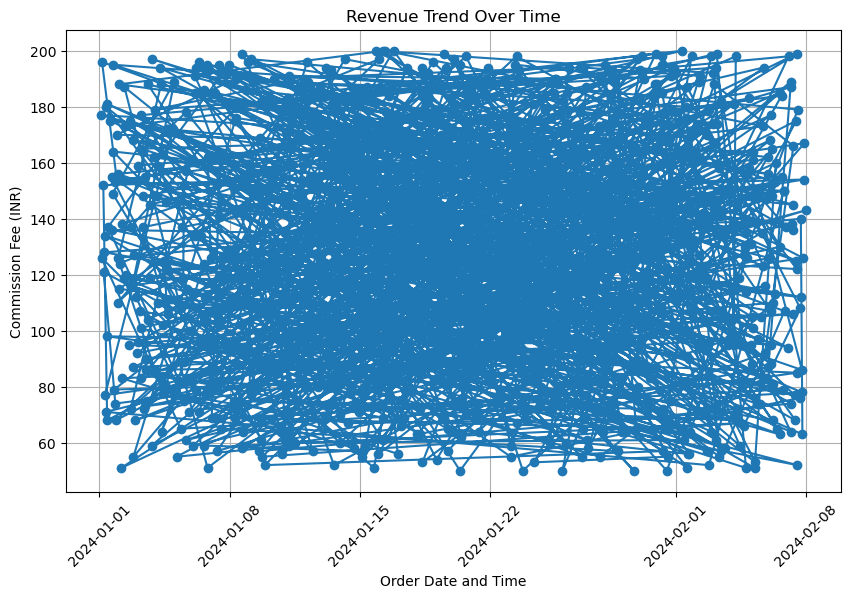

In [12]:
# Line plot of revenue over time
plt.figure(figsize=(10, 6))
plt.plot(food_orders['Order Date and Time'], food_orders['Commission Fee'], marker='o', linestyle='-')
plt.title('Revenue Trend Over Time')
plt.xlabel('Order Date and Time')
plt.ylabel('Commission Fee (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Line Plot of Revenue Over Time:

This line plot depicts the trend of revenue generated over time. By plotting the commission fees earned from each order against the corresponding order date and time, stakeholders can observe how revenue fluctuates over different periods. This visualization aids in identifying revenue trends, seasonal patterns, and potential correlations with external factors.

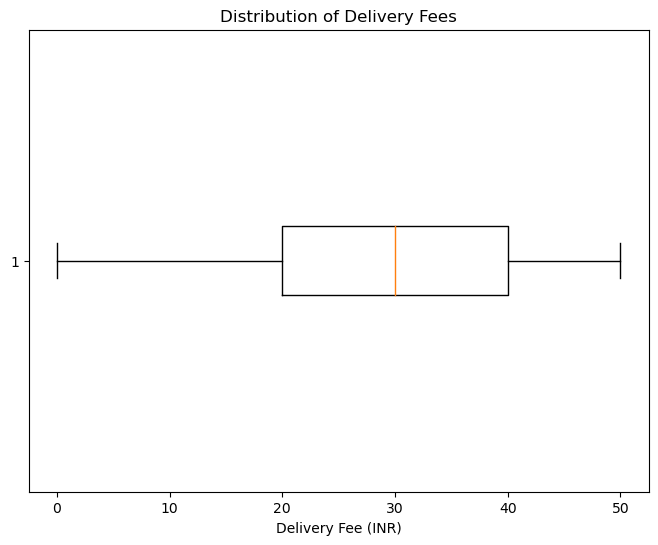

In [13]:
# Boxplot of delivery fees
plt.figure(figsize=(8, 6))
plt.boxplot(food_orders['Delivery Fee'], vert=False)
plt.title('Distribution of Delivery Fees')
plt.xlabel('Delivery Fee (INR)')
plt.show()


### Boxplot of Delivery Fees:

The boxplot visualization displays the distribution of delivery fees across all orders. It provides insights into the variability and central tendency of delivery fees, including the median, quartiles, and potential outliers. This visualization helps in understanding the range of costs associated with delivering orders.

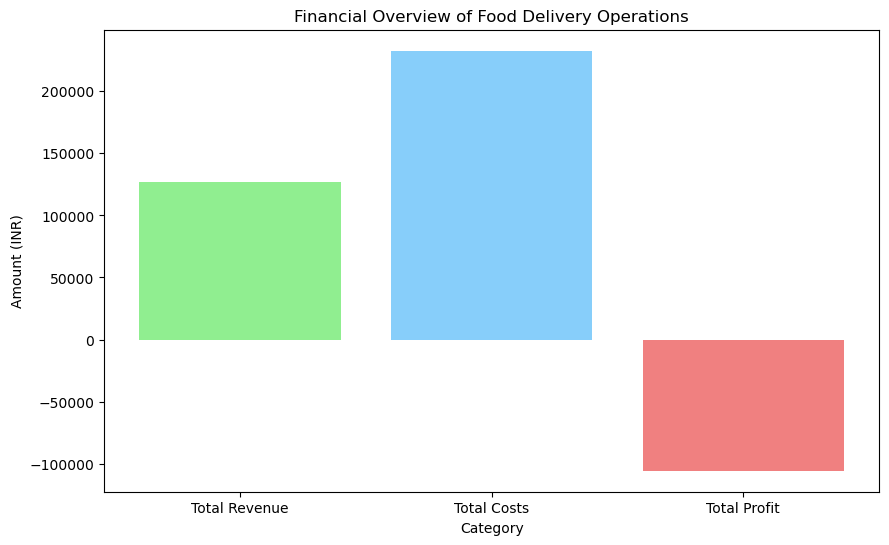

In [14]:
# Bar chart comparing total revenue, costs, and profit
categories = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['lightgreen', 'lightskyblue', 'lightcoral'])
plt.title('Financial Overview of Food Delivery Operations')
plt.xlabel('Category')
plt.ylabel('Amount (INR)')
plt.show()


### Bar Chart Comparing Total Revenue, Costs, and Profit:

This bar chart provides a comparative view of total revenue, total costs, and total profit generated by the food delivery operations. Each category is represented by a bar, with the height of the bar indicating the corresponding financial amount. By comparing these bars, stakeholders can easily assess the financial performance of the service

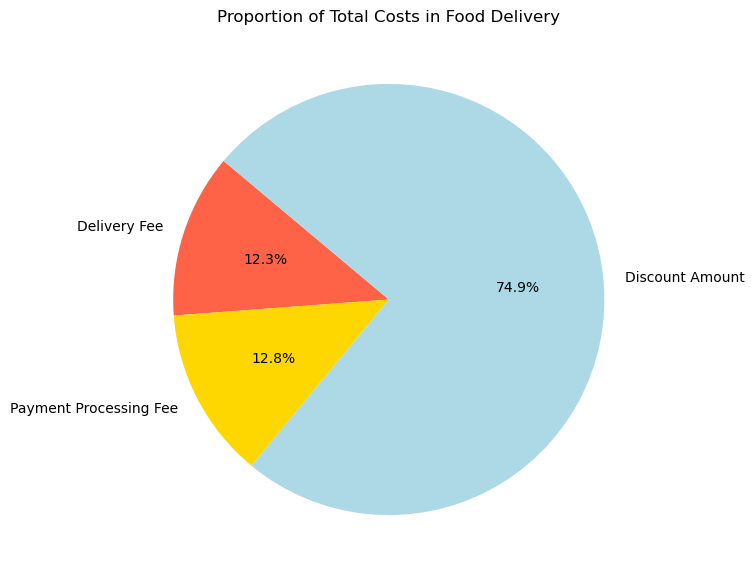

In [15]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart provides a visual representation of the distribution of total costs among different expense categories within the food delivery operations. Specifically, it highlights the allocation of costs towards delivery fees, payment processing fees, and discount amounts.

The prominence of discounts in the pie chart indicates that a substantial portion of the total costs is attributed to promotional strategies. This observation suggests that the discounts offered to customers significantly impact the overall profitability of the food delivery service.

The heavy reliance on promotional strategies, as depicted by the sizable portion of costs allocated to discounts, raises considerations about the sustainability and effectiveness of current discounting practices. It prompts further analysis and evaluation of the impact of these promotional strategies on profitability and customer acquisition.

The pie chart underscores the importance of optimizing discount strategies to strike a balance between attracting customers and maintaining profitability in the competitive landscape of food delivery services.

 ## Profitable Strategy: Finding the Sweet Spot for Discounts and Commissions

In light of our analysis, it's evident that the current discounting practices are leading to substantial losses in the food delivery service. To reverse this trend and ensure profitability, we need to devise a new strategy that strikes a balance between offering discounts and charging commissions. By analyzing the characteristics of profitable orders, we aim to identify a "sweet spot" for commission and discount percentages that fosters profitability while maintaining customer satisfaction.

**Strategy Development:**

1. **Average Commission Percentage for Profitable Orders:**
   - Calculate the average commission percentage based on profitable orders. This metric will serve as a guideline for setting commission rates that ensure profitability without deterring restaurant partners.

2. **Average Discount Percentage for Profitable Orders:**
   - Determine the average discount percentage for profitable orders. This analysis will help identify the threshold level of discounts that still allows for profitability, guiding future discounting strategies.

**Implications and Recommendations:**
Based on the new averages calculated, we can suggest adjustments to commission rates and discount strategies. These adjustments should not only aim to make individual orders profitable but also have a broader impact across all orders to improve overall profitability. By aligning commission and discount percentages with the characteristics of profitable orders, we can implement a targeted strategy that maximizes revenue while minimizing costs.

Developing a profitable strategy requires a nuanced understanding of the relationship between discounts, commissions, and profitability. By leveraging insights from profitable orders, we can identify optimal commission and discount percentages that drive sustainable growth and profitability in the food delivery service.

In [16]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


C:\Users\anike\AppData\Local\Temp\ipykernel_19564\2426516542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
C:\Users\anike\AppData\Local\Temp\ipykernel_19564\2426516542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


## Optimizing Profitability: Comparing Actual vs. Recommended Discounts and Commissions

Building upon our analysis of profitable orders, we have identified a new set of averages that could serve as a "sweet spot" for commission and discount percentages in the food delivery service. By comparing actual versus recommended discounts and commissions, we aim to assess the potential impact on profitability and inform strategic decision-making.

**Analysis:**

1. **New Average Commission Percentage: 30.51%**
   - The higher commission percentage for profitable orders suggests its significance in achieving profitability.

2. **New Average Discount Percentage: 5.87%**
   - The lower discount percentage for profitable orders indicates its potential role in maintaining profitability without compromising order volume.

**Strategy Recommendations:**
Based on the analysis, a strategy targeting a commission rate of around 30% and a discount rate of approximately 6% could enhance profitability across all orders.

**Next Steps:**

1. **Calculate Profitability Using Actual Discounts and Commissions:**
   - Determine profitability per order using the actual discounts and commissions present in the dataset.

2. **Simulate Profitability Using Recommended Discounts and Commissions:**
   - Forecast the profitability per order by simulating the impact of recommended discounts (6%) and commissions (30%).

By visualizing the comparison of profitability under actual versus recommended discounts and commissions, we can evaluate the potential financial implications of adjusting these parameters. This analysis will provide valuable insights for optimizing profitability and guiding strategic decisions in the food delivery service.

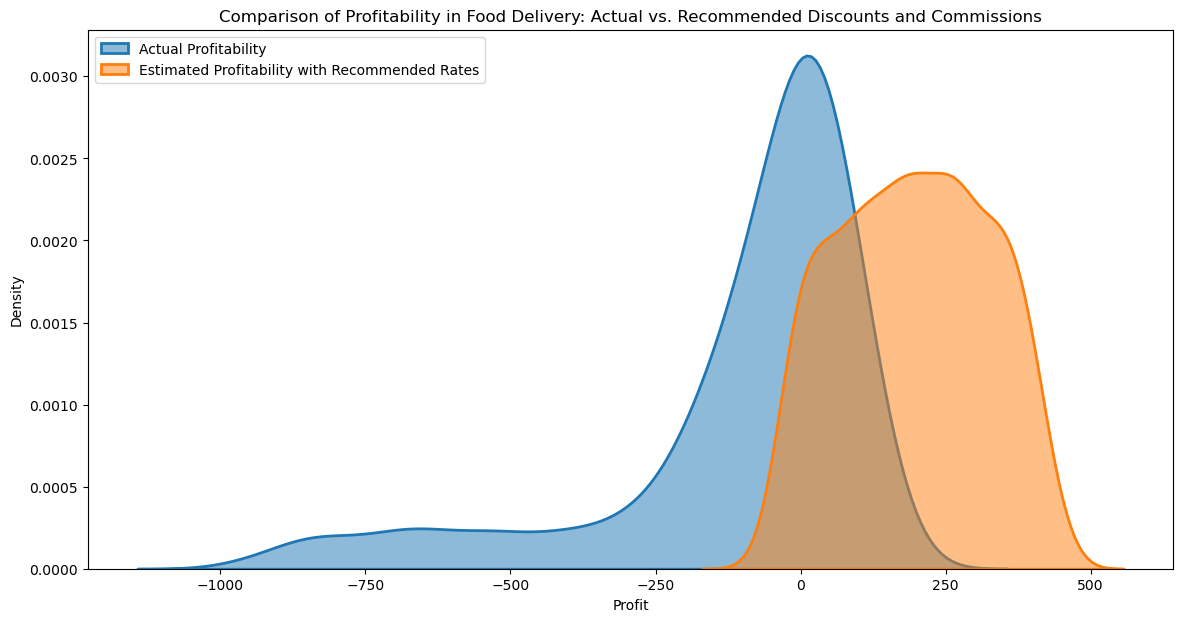

In [17]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

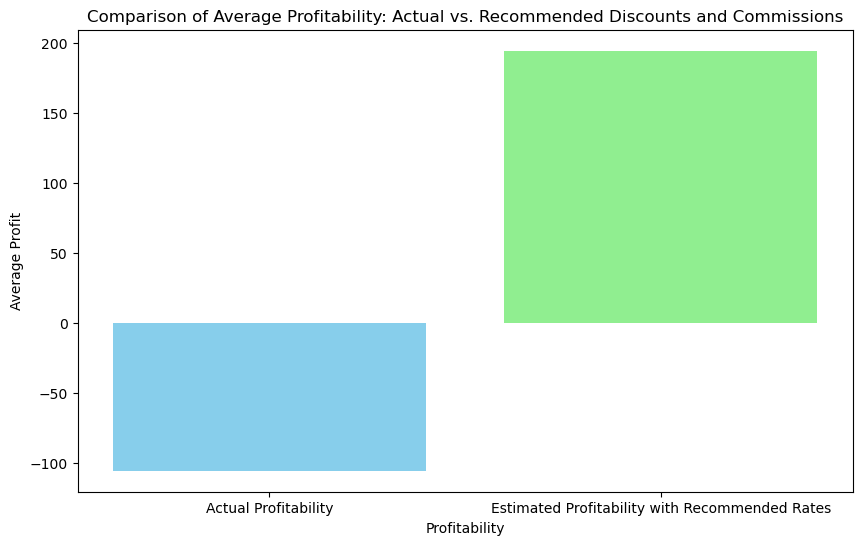

In [18]:
import numpy as np

# Calculate average profitability before and after implementing recommended rates
average_profit_actual = food_orders['Profit'].mean()
average_profit_simulated = food_orders['Simulated Profit'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Actual Profitability', 'Estimated Profitability with Recommended Rates'],
        [average_profit_actual, average_profit_simulated],
        color=['skyblue', 'lightgreen'])
plt.title('Comparison of Average Profitability: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profitability')
plt.ylabel('Average Profit')
plt.show()


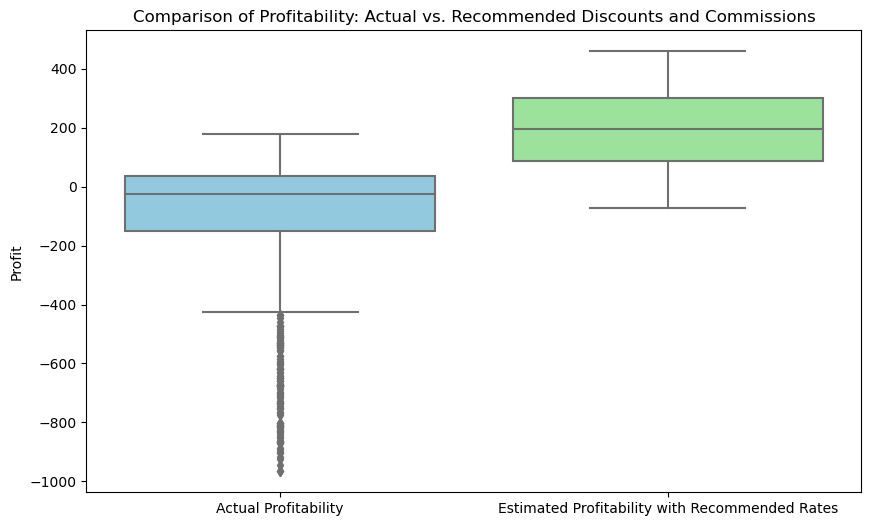

In [19]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[food_orders['Profit'], food_orders['Simulated Profit']], palette=['skyblue', 'lightgreen'])
plt.xticks([0, 1], ['Actual Profitability', 'Estimated Profitability with Recommended Rates'])
plt.title('Comparison of Profitability: Actual vs. Recommended Discounts and Commissions')
plt.ylabel('Profit')
plt.show()


The visualization compares the distribution of profitability per order under two scenarios: the actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%). 

In the actual profitability distribution, we observe a varied mix of profit outcomes. A significant portion of orders results in losses, as indicated by profits less than 0. Additionally, there is a broad spread of profit levels across orders, ranging from negative to positive values. This indicates that under the current discount and commission rates, the profitability of orders varies widely, with some orders contributing positively to profit while others incurring losses.

On the other hand, the simulated scenario with recommended discounts and commissions suggests a shift towards higher profitability per order. The distribution is noticeably skewed towards positive profit values, indicating that a higher proportion of orders are potentially profitable under the recommended adjustments. This skewness towards positive profit values suggests that the recommended adjustments could lead to a higher proportion of orders contributing positively to overall profitability.

Overall, the visualization provides insights into the potential impact of adjusting discounts and commissions on the distribution of profitability per order. It highlights the potential benefits of implementing the recommended rates in terms of increasing the proportion of profitable orders and improving overall profitability in the food delivery service.